# MICRO CREDIT DEFAULTER PROJECT


#### Problem Statement: 


A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order toimprove the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

#### Exercise:


Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
#importing training data
os.chdir("C:\GitBash\Files\Micro Credit Project")
df = pd.read_csv("Data file.csv")

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


##  EDA (EXPLANATORY DATA ANALYSIS)

In [4]:
#printing number of rows and columns
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))


We have 209593 Rows and 37 Columns in our dataframe


Here we have 2,09,593 rows present in 37 columns in the dataset.

In [5]:
# checking top 5 rows of the dataset
df.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
# checking bottom 5 rows of the dataset
df.tail(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [7]:
# Lets check information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [8]:
#checking the name of the columns present in the dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

DESCRIPTION OF COLUMNS

label Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn mobile number of user

aon age on cellular network in days

daily_decr30 Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90 Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30 Average main account balance over last 30 days

rental90 Average main account balance over last 90 days

last_rech_date_ma Number of days till last recharge of main account

last_rech_date_da Number of days till last recharge of data account

last_rech_amt_ma Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30 Number of times main account got recharged in last 30 days

fr_ma_rech30 Frequency of main account recharged in last 30 days

sumamnt_ma_rech30 Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30 Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30 Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90 Number of times main account got recharged in last 90 days

fr_ma_rech90 Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90 Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90 Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30 Number of times data account got recharged in last 30 days

fr_da_rech30 Frequency of data account recharged in last 30 days

cnt_da_rech90 Number of times data account got recharged in last 90 days

fr_da_rech90 Frequency of data account recharged in last 90 days

cnt_loans30 Number of loans taken by user in last 30 days

amnt_loans30 Total amount of loans taken by user in last 30 days

maxamnt_loans30 maximum amount of loan taken by the user in last 30 days

medianamnt_loans30 Median of amounts of loan taken by the user in last 30 days

cnt_loans90 Number of loans taken by user in last 90 days

amnt_loans90 Total amount of loans taken by user in last 90 days

maxamnt_loans90 maximum amount of loan taken by the user in last 90 days

medianamnt_loans90 Median of amounts of loan taken by the user in last 90 days

payback30 Average payback time in days over last 30 days

payback90 Average payback time in days over last 90 days

pcircle telecom circle

pdate date

In [9]:
#checking the datatype of each column present in the dataset.
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

We dont need to check isnull value as already mentioned that this dataset has no null values

In [10]:
# lets check the no. of unique values present in each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

OBSERVATION 


Here we can see column Unnamed:0 which have all the unique values. so we will drop this column as we dont require this column as it specify serial no. of rows present in the column.

Here we can also observe some more columns, we can see msisdn which has more than 90% or 1,86,243 unique values present. this column have mobile no.'s which are not going to help us in prediction. so, we shall drop this column as well.

There are 4 more columns which we need to analyze more because they are having approx. 70% unique values present. those columns are daily_decr30, daily_decr90, rental30, rental90.

There is a column pcircle which is having only 1 unique value present in all the rows. it is not going to do any good for our model, so we should drop this column too.

In [11]:
# dropping the column Unnamed: 0
df.drop(['Unnamed: 0','msisdn','pcircle'],axis=1,inplace=True)

In [12]:
# Dropping all the columns which are having 0 values in maximum rows.
df.drop(['last_rech_date_da','cnt_da_rech30','cnt_da_rech90','fr_da_rech30','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],axis=1,inplace=True)


In [13]:
# lets convert date column datatype from object to datetime and then split that column into 3.
df['pdate']=pd.to_datetime(df['pdate'])

In [14]:
#taking days and month from pdate because years are same in all data is 2016
df['pmonth']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.month
df['pday']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.day
df.drop('pdate',axis=1,inplace=True)

In [15]:
# Lets check the first 5 rows of dataset after dropping columns and changing date values
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22


In [17]:
#statistical view of the dataset to know more.
df.describe(include='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,...,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,...,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


OBSERVATION

Difference in mean and median most of the columns mean is more than median which denotes right skewed data is high.

Standard deviation is very high in aon, daily_decr30,daily_decr90, rental30,rental90,last_rech_date_na,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal90,maxamnt_loans30,cnt_loans90 which denotes that data is diversified.

## DATA VISUALIZATION

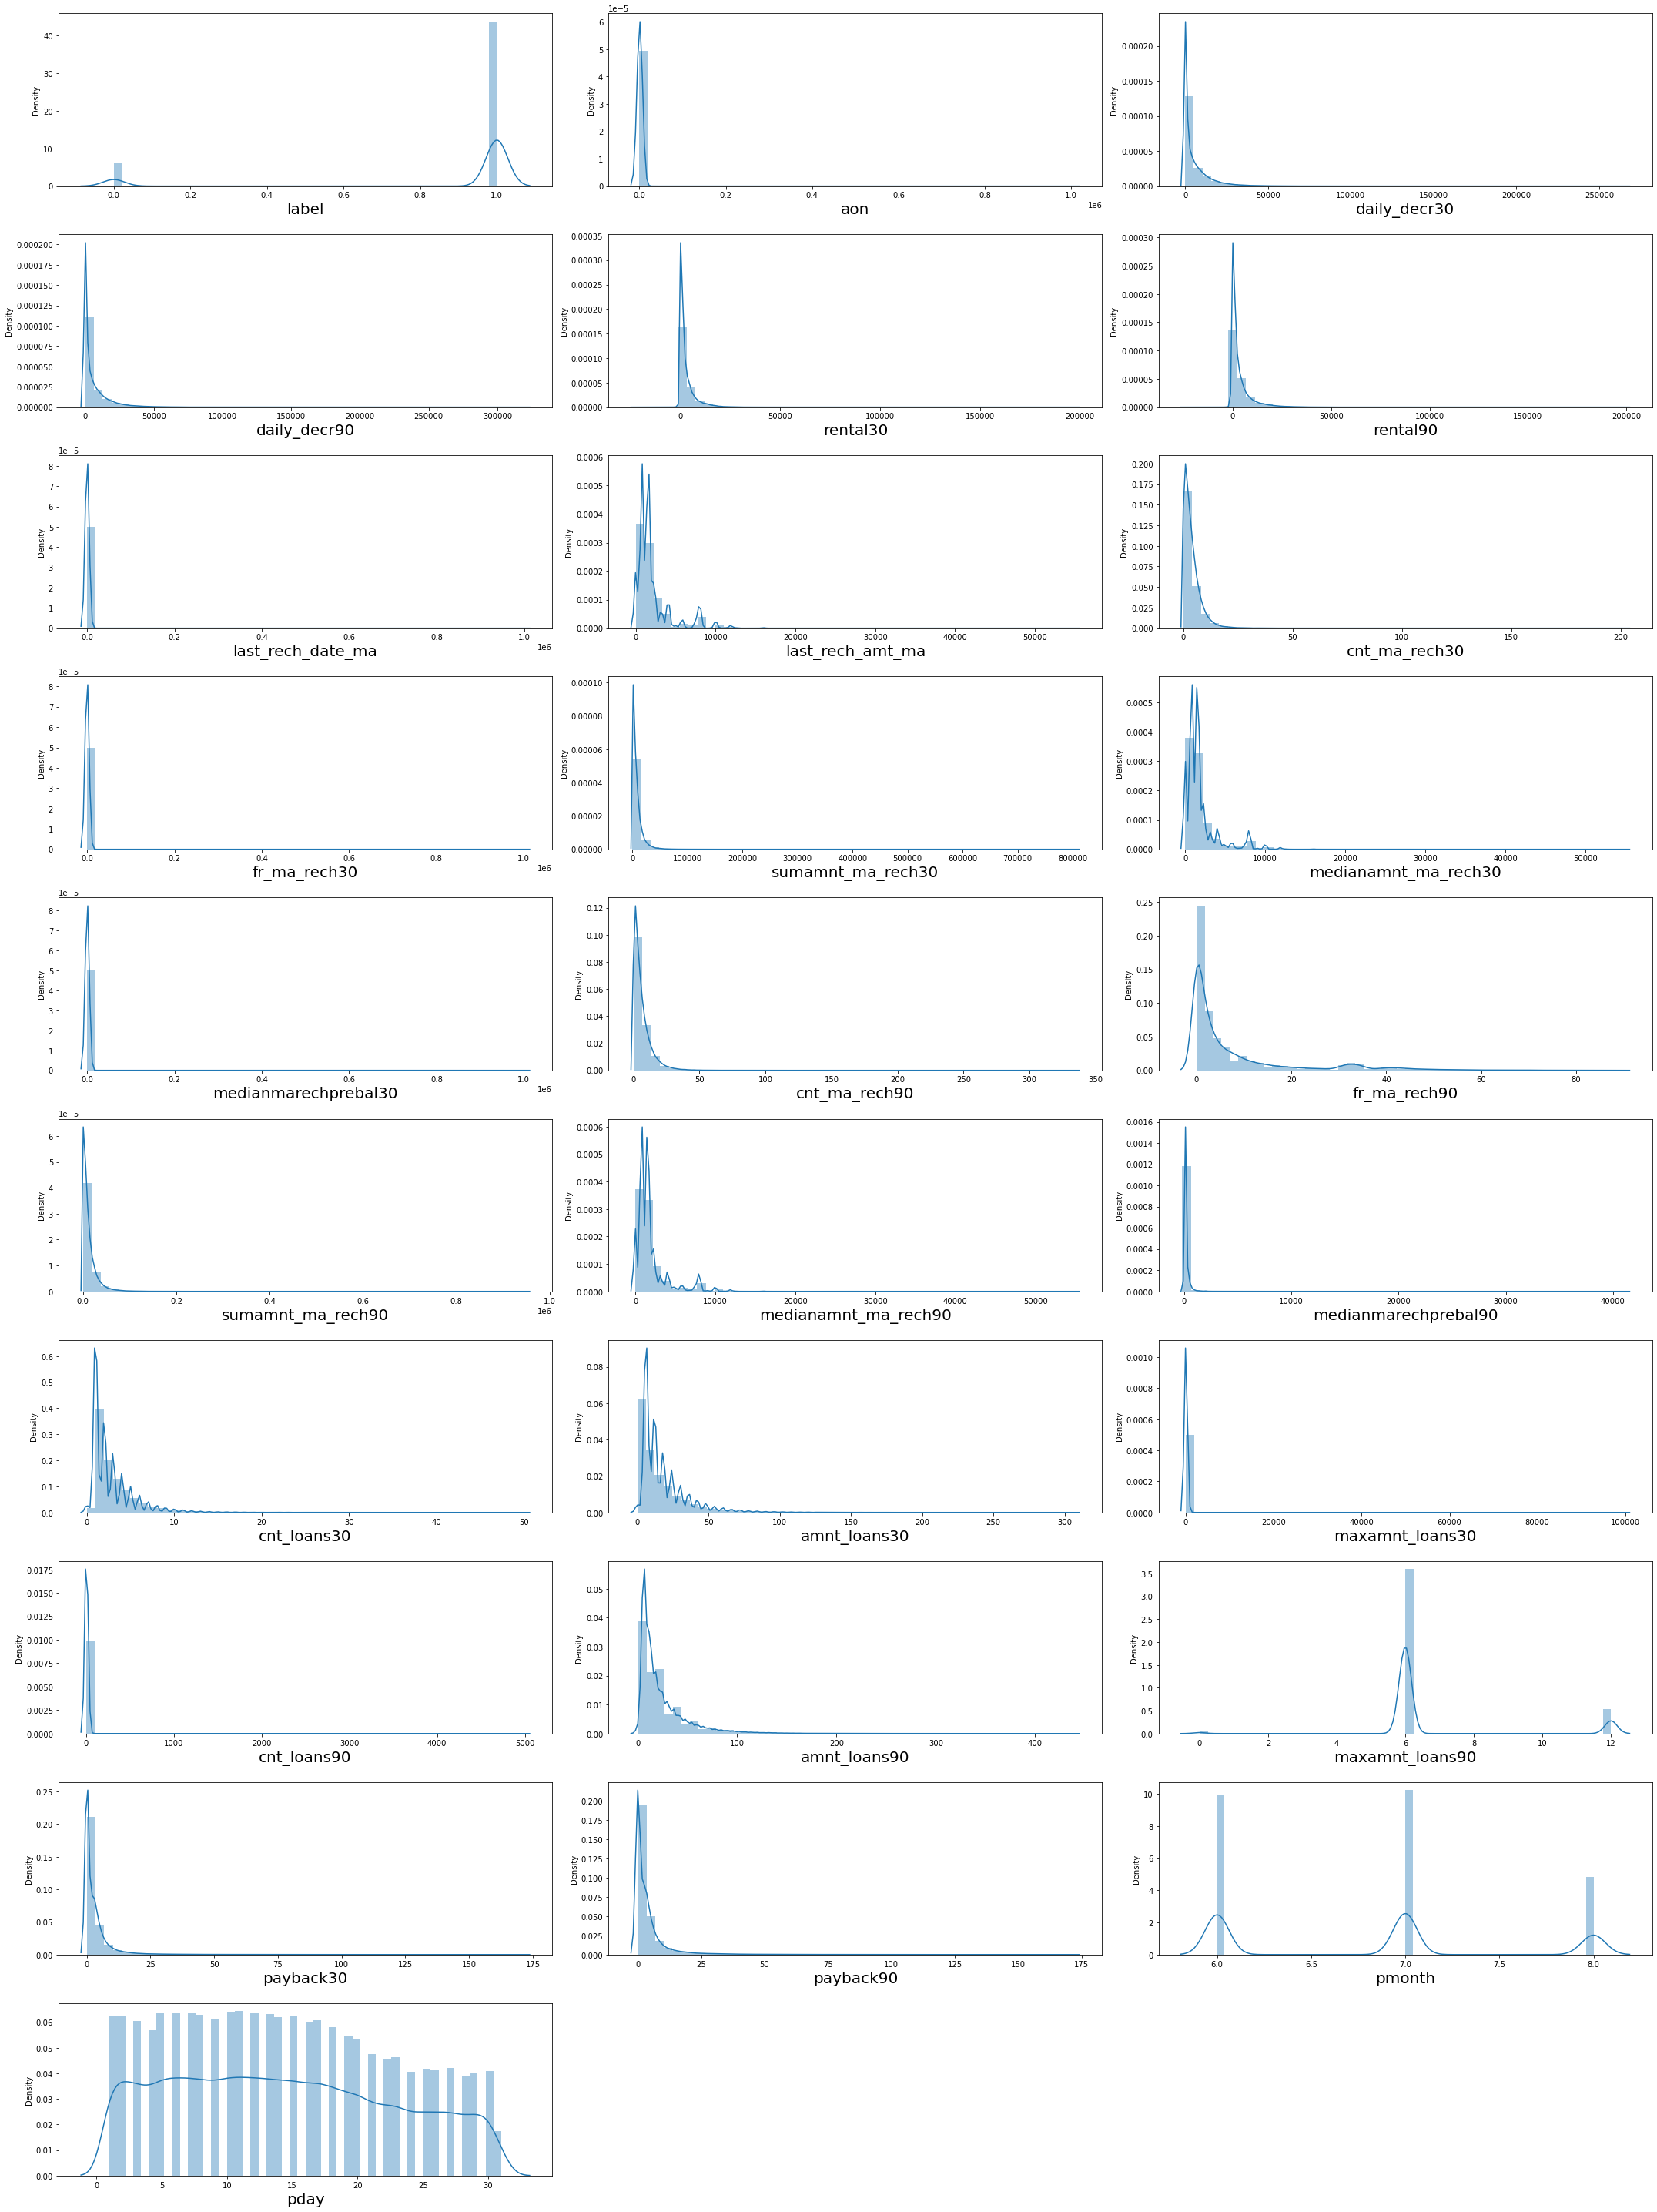

In [21]:
plt.figure(figsize=(30,40))
plotnumber=1
for i in df.columns:
    if plotnumber <=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='label', ylabel='count'>

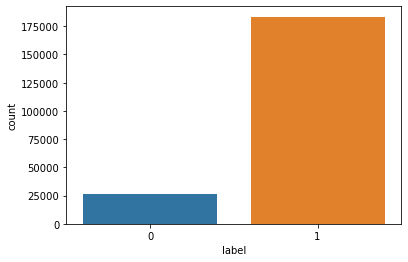

In [18]:
#count for target column
sns.countplot(df['label'])

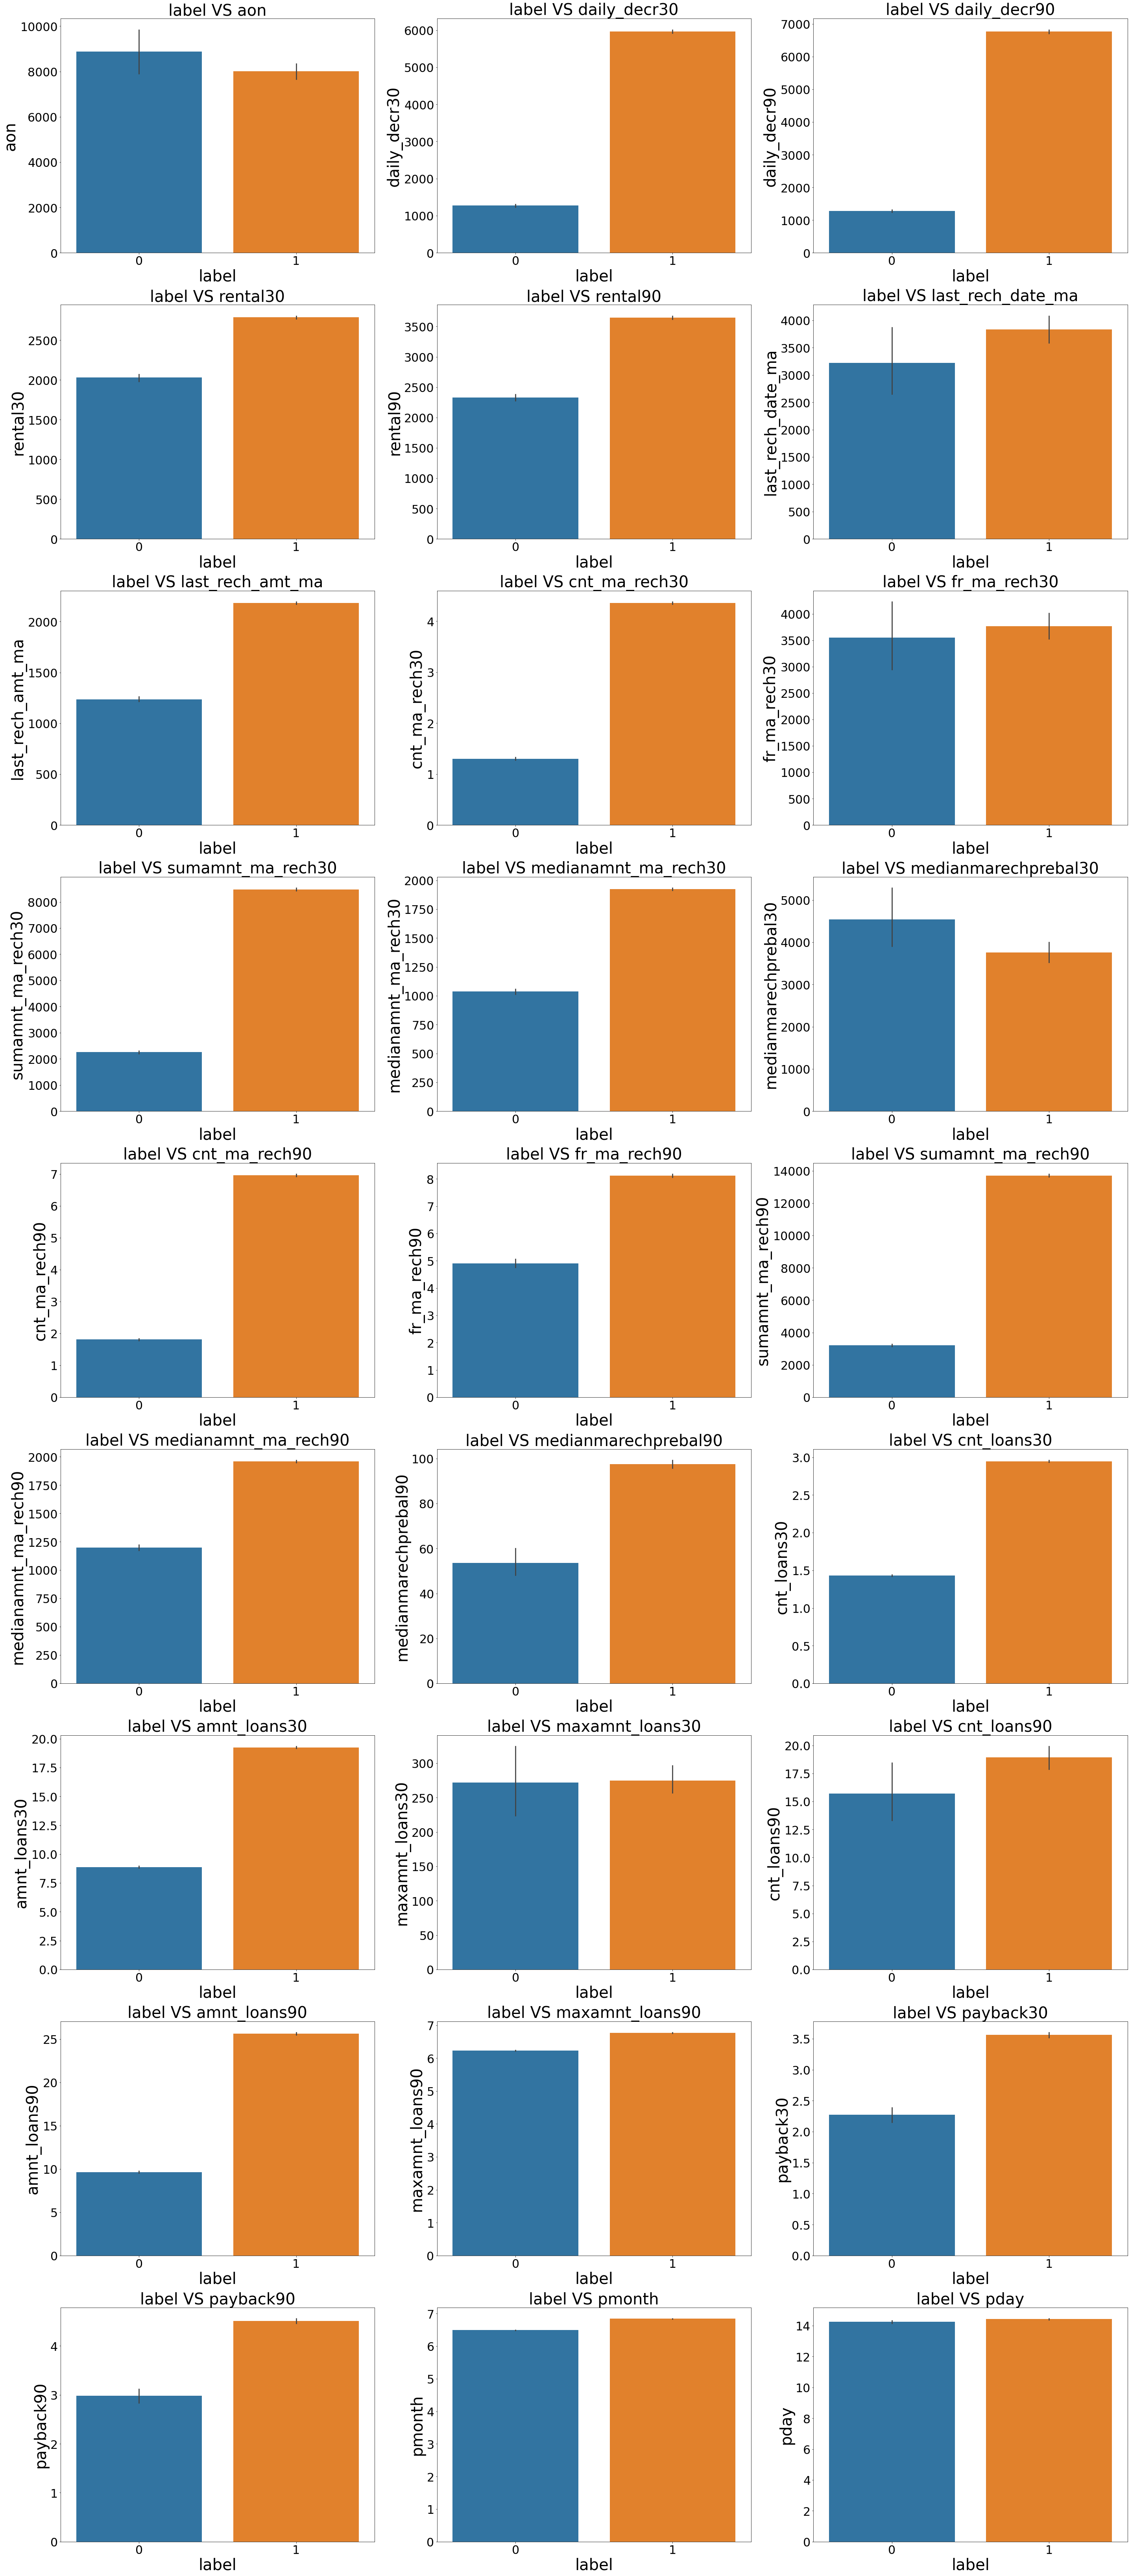

In [22]:
# Relation between target and other column :
col=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']
plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'],y=df[col[i]])
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

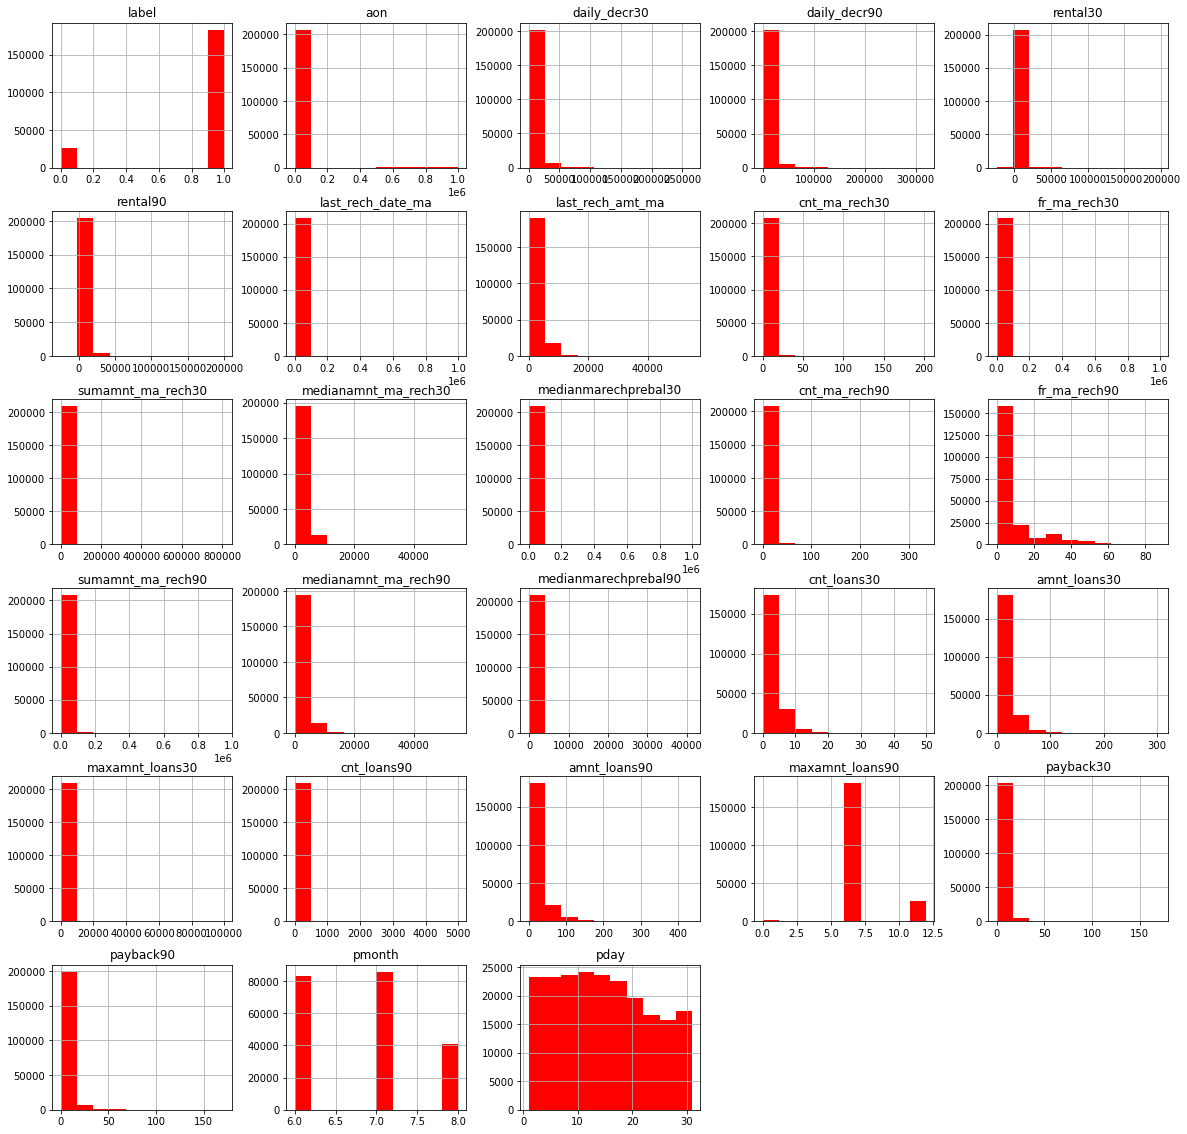

In [23]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

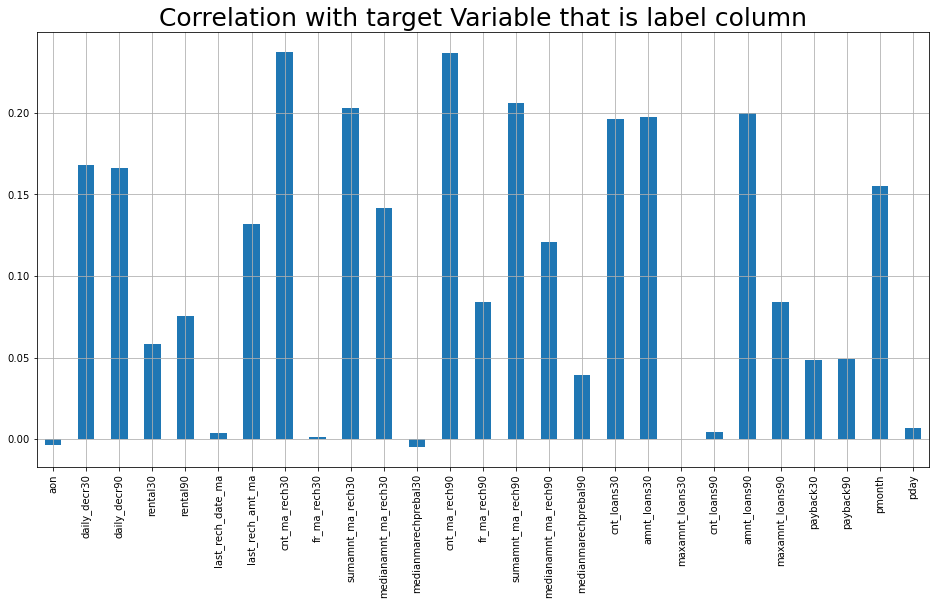

In [24]:
#Multivariate Analysis
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

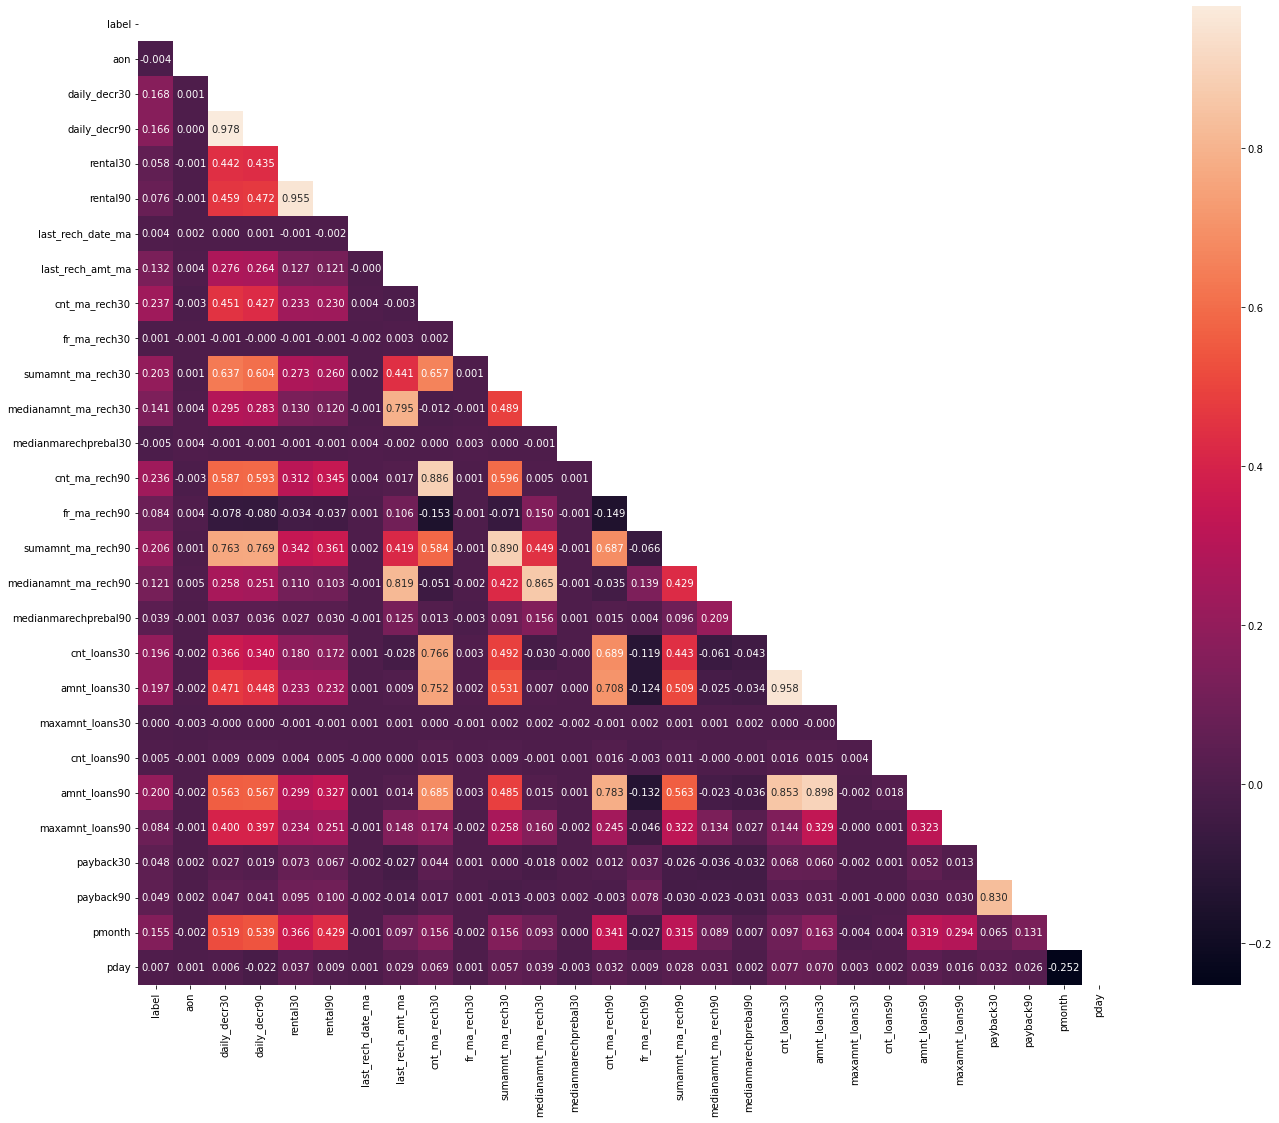

In [25]:
# lets visualize correlation of all the feature columns with target column 
tri= np.triu(df.corr())
plt.figure(figsize=(27,18))
sns.heatmap(df.corr(), annot=True, square=True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

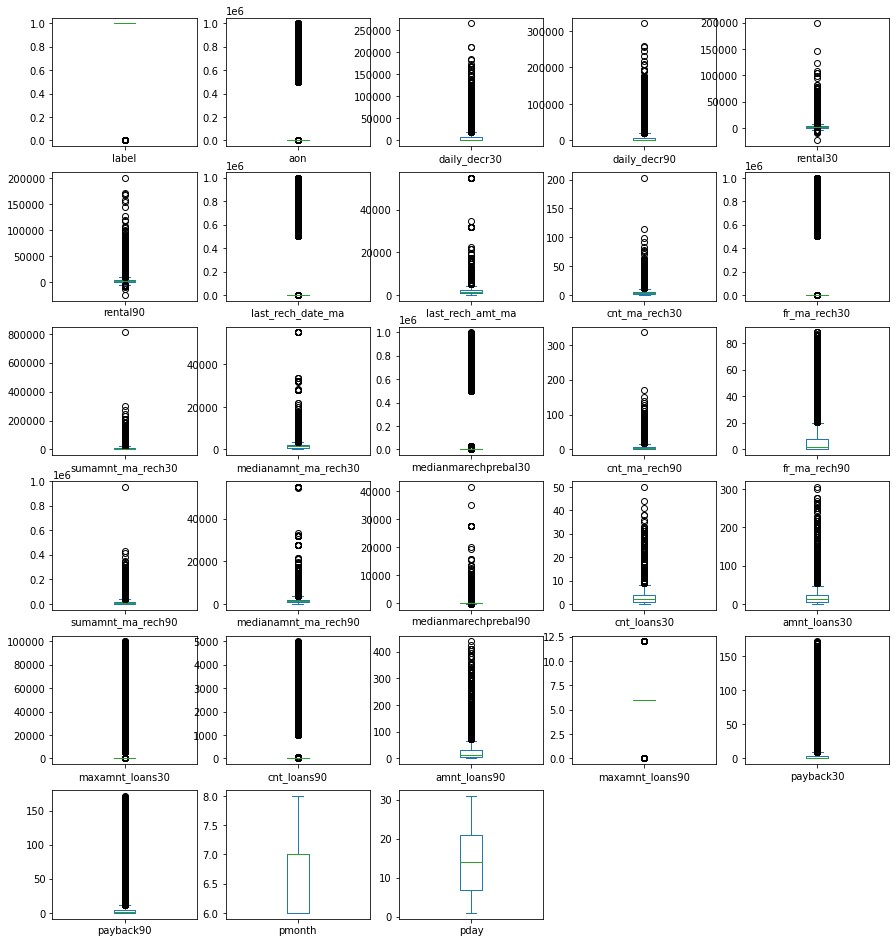

In [26]:
# OUTLIERS

df.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

OBSERVATION

Outliers are present in most of the column of dataset.

Removing outliers through z score method

In [27]:
# lets make a list of all features except day and month to remove outliers.
a=df[['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech90','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90']]



In [28]:
# lets remove outliers using ZScore Method
# importing required library for ZScore
from scipy.stats import zscore
# Lets execute zscore to remove outliers
z=np.abs(zscore(a))
z

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech90,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0.103577,0.252299,0.276346,0.573844,0.558583,0.069637,0.221637,0.464760,0.069279,0.552756,...,0.156410,0.228933,0.297116,0.342470,0.063284,0.073493,0.439950,0.334212,2.904700,2.394093
1,0.097764,0.731037,0.553380,0.231788,0.036020,0.069303,1.570178,0.699718,0.069670,0.392058,...,1.884253,0.083923,0.688582,0.342470,0.061871,0.077941,0.439950,2.517690,0.385630,0.419233
2,0.100102,0.432011,0.429033,0.416020,0.447674,0.069619,0.221637,0.699718,0.069670,0.644049,...,0.156410,0.069622,0.688582,0.687700,0.063284,0.077941,0.666624,0.334212,0.385630,0.419233
3,0.103986,0.581326,0.555125,0.587935,0.576036,0.068914,0.471344,0.934677,0.069670,0.679166,...,0.440797,0.242476,0.297116,0.342470,0.063284,0.073493,0.439950,0.334212,0.385630,0.419233
4,0.094660,0.567293,0.543274,0.369886,0.413227,0.069600,0.103151,0.710030,0.069633,0.658438,...,0.491625,0.154451,1.660218,1.383682,0.063284,0.051250,0.693417,0.334212,0.120890,0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.101833,0.567157,0.543159,0.372140,0.414910,0.069656,0.836664,0.229802,0.069633,0.118178,...,0.630936,0.000584,0.297116,0.342470,0.063284,0.073493,0.439950,0.334212,0.272170,0.322221
209589,0.092969,0.579622,0.553686,0.223791,0.304144,0.069600,0.544737,0.005156,0.069652,0.495809,...,0.524383,0.053558,0.094351,0.002761,0.063284,0.069044,0.213277,0.334212,0.272170,0.322221
209590,0.093788,0.700790,0.533194,0.735567,0.937500,0.069619,0.221637,0.240114,0.069521,0.367533,...,0.156410,0.121597,0.485818,1.383682,0.061871,0.055699,1.146764,2.517690,0.068209,0.047356
209591,0.084289,0.770755,0.594558,0.529352,0.433039,0.069637,0.544737,0.240114,0.069596,0.328916,...,0.262243,0.021598,0.297116,0.002761,0.061871,0.069044,0.013396,2.517690,0.385630,0.599385


In [29]:
# lets create new dataframe
df1=df[(z<3).all(axis=1)]
df1

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


In [30]:
#Lets check the shape of new dataframe
df1.shape

(171750, 28)

In [31]:
df.shape

(209593, 28)

In [32]:
loss_percent=(209593-171750)/209593*100
print(loss_percent,'%')

18.05546940976082 %


Here we are losing huge amount of data using zscore which is 18.05% data.so, lets not remove outliers using zscore as it might affect our model working.Lets try percentile method

In [33]:
#percentile method
for i in a:
    if df[i].dtypes != 'object':
        b=df[i].quantile([0.01,0.98]).values
        df[i][df[i]<=b[0]]=b[0]  
        df[i][df[i]>=b[1]]=b[1]

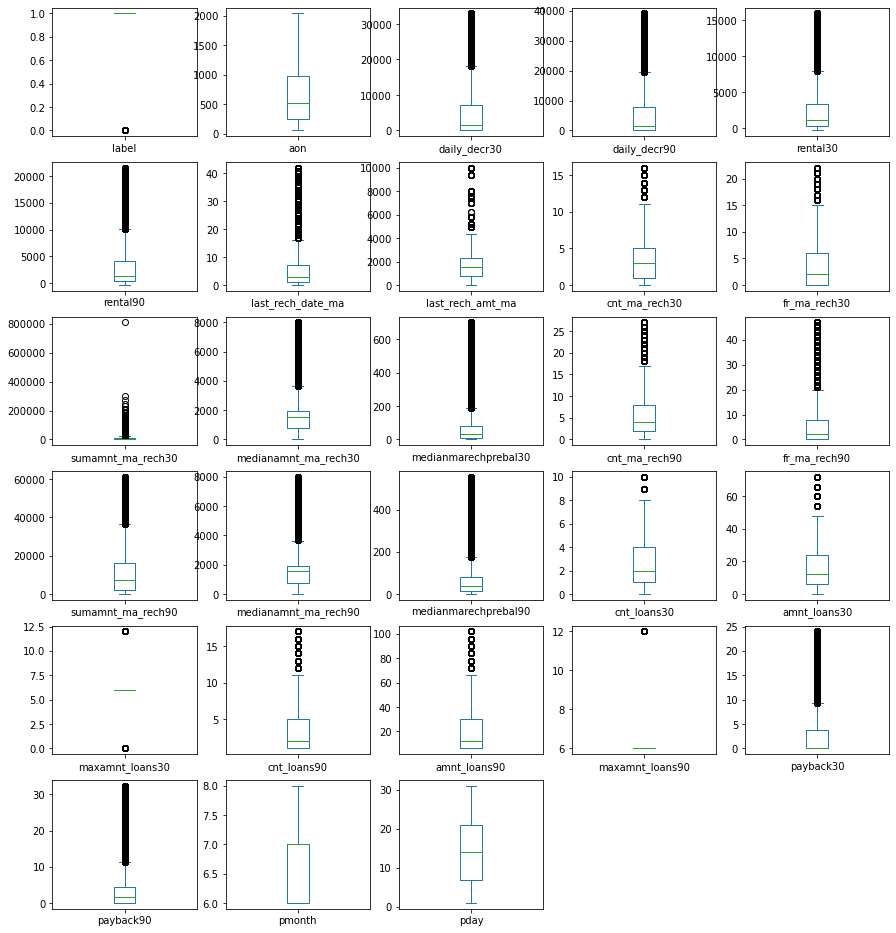

In [35]:
#checking outliers now
df.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

### SKEWNESS

In [37]:
df.skew().sort_values()


label                  -2.270254
pday                    0.199845
pmonth                  0.343242
aon                     0.935197
maxamnt_loans30         1.405285
cnt_ma_rech30           1.415594
cnt_ma_rech90           1.569282
cnt_loans30             1.576547
fr_ma_rech30            1.703205
amnt_loans30            1.733837
amnt_loans90            1.840032
sumamnt_ma_rech90       1.863524
cnt_loans90             1.923139
daily_decr30            1.974394
fr_ma_rech90            1.985638
last_rech_amt_ma        2.080016
daily_decr90            2.091659
rental30                2.106223
medianamnt_ma_rech30    2.115971
medianamnt_ma_rech90    2.133303
rental90                2.194864
maxamnt_loans90         2.241299
last_rech_date_ma       2.615836
payback30               2.648819
medianmarechprebal90    2.666638
payback90               2.829305
medianmarechprebal30    2.830858
sumamnt_ma_rech30       6.386787
dtype: float64

OBSERVATION

Skewness is present in most of the column.
We will remove skwness in all columns except our target column.

In [38]:
# Lets make list of columns with skewness
skew=['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90']


In [39]:
# importing required library
from sklearn.preprocessing import PowerTransformer
#lets remove skewness using yeo-johnson method
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box-cox' or 'yeo-johnson'\n"

In [40]:
df[skew]=scaler.fit_transform(df[skew].values)
df[skew]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.696438,0.493155,0.470041,-0.653011,-0.638396,-0.318148,0.081985,-0.292754,1.713444,-0.177906,...,0.147199,-0.830131,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,1.785799,1.821484
1,0.388296,1.119549,1.071131,0.499346,0.280078,1.551138,1.531119,-0.813308,-1.125020,0.219811,...,1.751936,0.380302,-0.917748,-0.105640,2.275299,-1.129610,-0.195308,1.340081e-12,-0.938528,-1.019522
2,0.042606,0.176750,0.161924,-0.349829,-0.409481,0.009030,0.081985,-0.813308,-1.125020,-0.535362,...,0.147199,0.438673,-0.917748,-0.905221,-0.269609,-1.129610,-1.184033,-1.948303e-13,-0.938528,-1.019522
3,-0.817739,-1.123765,-1.121318,-0.688460,-0.685134,2.051429,-0.297745,-1.676293,-1.125020,-1.902189,...,-0.264481,-1.258848,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,-0.938528,-1.019522
4,0.754834,-0.591620,-0.591349,-0.275861,-0.349346,0.249421,0.454627,1.016428,0.160683,1.262660,...,0.808981,0.010082,1.608532,1.499492,-0.269609,1.235280,1.166897,-1.948303e-13,0.640306,0.428035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.277218,-0.589096,-0.588854,-0.279385,-0.352211,-0.814508,1.069436,0.083815,0.160683,0.664001,...,0.924348,0.675615,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,0.092407,-0.104773
209589,0.925010,-0.986372,-0.983738,-0.062133,-0.175683,0.249421,-0.437741,0.380110,-0.270330,-0.175310,...,-0.415078,0.825560,0.557541,0.394877,-0.269609,0.340924,0.305428,-1.948303e-13,0.092407,-0.104773
209590,0.844700,1.108188,1.062561,1.029157,1.242338,0.009030,0.081985,0.624962,1.118037,0.575767,...,0.147199,0.203629,0.935485,1.499492,2.275299,1.095711,1.378295,1.340081e-12,0.979695,0.754284
209591,1.607797,1.134119,1.088187,-0.555095,-0.383530,-0.318148,-0.437741,0.624962,0.641001,0.795555,...,0.602319,0.740052,0.005250,0.394877,2.275299,0.340924,0.625139,1.340081e-12,-0.938528,1.354948


In [41]:
#checking skewness again
df.skew().sort_values()

label                  -2.270254
sumamnt_ma_rech30      -0.291322
sumamnt_ma_rech90      -0.265440
medianamnt_ma_rech30   -0.239052
daily_decr30           -0.143090
daily_decr90           -0.132714
medianamnt_ma_rech90   -0.100228
last_rech_amt_ma       -0.096659
aon                    -0.059160
medianmarechprebal30   -0.046675
medianmarechprebal90   -0.032049
cnt_ma_rech90          -0.012068
cnt_ma_rech30          -0.010127
maxamnt_loans90         0.000000
amnt_loans30            0.006048
cnt_loans30             0.042626
last_rech_date_ma       0.043786
fr_ma_rech30            0.133182
amnt_loans90            0.133935
fr_ma_rech90            0.140655
pday                    0.199845
payback90               0.201580
cnt_loans90             0.206928
payback30               0.287988
pmonth                  0.343242
maxamnt_loans30         0.399869
rental30                0.720837
rental90                0.757030
dtype: float64

We have successfully removed skewness.

#### STANDARD SCALING

In [43]:
# lets first separate target column and features column
x=df.drop('label',axis=1)
y=df['label']

In [44]:
# Importing all required libraries for standard scaler
from sklearn.preprocessing import StandardScaler
#lets scale the data using standard scaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [45]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,-0.696438,0.493155,0.470041,-0.653011,-0.638396,-0.318148,0.081985,-0.292754,1.713444,-0.177906,...,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381303,1.785799,1.821484,0.273360,0.663721
1,0.388296,1.119549,1.071131,0.499346,0.280078,1.551138,1.531119,-0.813308,-1.125020,0.219811,...,-0.917748,-0.105640,2.275299,-1.129610,-0.195308,2.622586,-0.938528,-1.019522,1.622099,-0.521271
2,0.042606,0.176750,0.161924,-0.349829,-0.409481,0.009030,0.081985,-0.813308,-1.125020,-0.535362,...,-0.917748,-0.905221,-0.269609,-1.129610,-1.184033,-0.381303,-0.938528,-1.019522,1.622099,0.545222
3,-0.817739,-1.123765,-1.121318,-0.688460,-0.685134,2.051429,-0.297745,-1.676293,-1.125020,-1.902189,...,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381303,-0.938528,-1.019522,-1.075378,-0.995267
4,0.754834,-0.591620,-0.591349,-0.275861,-0.349346,0.249421,0.454627,1.016428,0.160683,1.262660,...,1.608532,1.499492,-0.269609,1.235280,1.166897,-0.381303,0.640306,0.428035,-1.075378,0.900719


#### MULTICOLLINEARITY

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [48]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [49]:
calc_vif(x)

,Features,VIF values
0,aon,1.037461
1,daily_decr30,435.143157
2,daily_decr90,488.423047
3,rental30,18.327721
4,rental90,19.852332
5,last_rech_date_ma,1.871239
6,last_rech_amt_ma,6.533697
7,cnt_ma_rech30,39.456717
8,fr_ma_rech30,2.034265
9,sumamnt_ma_rech30,58.137782


We can see that Multicolinearity is present in our datset.Lets remove co;umn with highest vif.

In [50]:
x=x.drop(['daily_decr90'],axis=1)

In [51]:
calc_vif(x)

,Features,VIF values
0,aon,1.037449
1,daily_decr30,7.135514
2,rental30,17.743732
3,rental90,19.185854
4,last_rech_date_ma,1.870961
5,last_rech_amt_ma,6.530470
6,cnt_ma_rech30,39.393368
7,fr_ma_rech30,2.033686
8,sumamnt_ma_rech30,57.869987
9,medianamnt_ma_rech30,15.132193


amnt_loans30 has still high  vif score of 114.18 so lets drop it

In [52]:
x=x.drop(['amnt_loans30'],axis=1)

In [53]:
calc_vif(x)

,Features,VIF values
0,aon,1.037414
1,daily_decr30,7.128267
2,rental30,17.743553
3,rental90,19.184078
4,last_rech_date_ma,1.865002
5,last_rech_amt_ma,6.529874
6,cnt_ma_rech30,39.385756
7,fr_ma_rech30,2.018502
8,sumamnt_ma_rech30,57.727437
9,medianamnt_ma_rech30,15.056842


lets drop the column with highest VIF value i.e sumamnt_ma_rech30

In [54]:
x=x.drop(['sumamnt_ma_rech30'],axis=1)

In [55]:
calc_vif(x)

,Features,VIF values
0,aon,1.037336
1,daily_decr30,7.102868
2,rental30,17.660620
3,rental90,19.110226
4,last_rech_date_ma,1.840841
5,last_rech_amt_ma,6.413221
6,cnt_ma_rech30,12.726567
7,fr_ma_rech30,2.012923
8,medianamnt_ma_rech30,5.993693
9,medianmarechprebal30,4.807761


lets drop the column with highest VIF value i.e amnt_loans90

In [57]:
x=x.drop(['amnt_loans90'],axis=1)

In [58]:
calc_vif(x)

,Features,VIF values
0,aon,1.036650
1,daily_decr30,7.102419
2,rental30,17.659856
3,rental90,19.110216
4,last_rech_date_ma,1.840402
5,last_rech_amt_ma,6.413138
6,cnt_ma_rech30,12.604015
7,fr_ma_rech30,2.011437
8,medianamnt_ma_rech30,5.985320
9,medianmarechprebal30,4.804843


lets drop the column with highest VIF value i.e cnt_ma_rech9

In [60]:
x=x.drop(['cnt_ma_rech90'], axis=1)

In [61]:
calc_vif(x)

,Features,VIF values
0,aon,1.034758
1,daily_decr30,7.061077
2,rental30,17.542088
3,rental90,18.981784
4,last_rech_date_ma,1.640542
5,last_rech_amt_ma,6.366762
6,cnt_ma_rech30,6.518589
7,fr_ma_rech30,2.010581
8,medianamnt_ma_rech30,5.847247
9,medianmarechprebal30,4.772775


lets drop the column with highest VIF value i.e rental90

In [62]:
x=x.drop(['rental90'],axis=1)

In [63]:
calc_vif(x)

,Features,VIF values
0,aon,1.034757
1,daily_decr30,6.868327
2,rental30,1.386383
3,last_rech_date_ma,1.636078
4,last_rech_amt_ma,6.361878
5,cnt_ma_rech30,6.468216
6,fr_ma_rech30,2.010318
7,medianamnt_ma_rech30,5.846438
8,medianmarechprebal30,4.772412
9,fr_ma_rech90,1.831489


sumamnt_ma_rech90 has vif score of 11.95 so lets drp it

In [64]:
x=x.drop(["sumamnt_ma_rech90"],axis=1)

In [65]:
calc_vif(x)

,Features,VIF values
0,aon,1.034657
1,daily_decr30,6.522045
2,rental30,1.379389
3,last_rech_date_ma,1.611831
4,last_rech_amt_ma,6.124822
5,cnt_ma_rech30,3.461454
6,fr_ma_rech30,2.010185
7,medianamnt_ma_rech30,5.810675
8,medianmarechprebal30,4.723396
9,fr_ma_rech90,1.825639


Multicollinearity is now removed from all columns.

#### SMOTE (STANDARDISING TARGET COLUMN)

In [66]:
#Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

<AxesSubplot:xlabel='label', ylabel='count'>

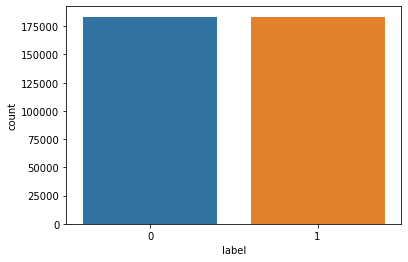

In [67]:
#Visualize the data after balancing
sns.countplot(y)

OBSERVATION

Data in Target Column "Income" is balanced using SMOTE

#### MACHINE LEARNING


Since the y (Target) has Categorical values, we will use Logistic Regression



##### BEST RANDOM STATE

In [68]:
#lets import all required libraries 
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [69]:
#lets find best random state and accuracy score
max_acc=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        mar_rs=i
        
print("Best Accuracy is ", max_acc, "on random_state ",max_rs)

Best Accuracy is  0.9550604675673957 on random_state  0


Best Random state is found to be 0 with best accuracy score 95.5 %

In [70]:
##### TRAIN TEST SPLIT

In [71]:
# splitting the dataset for training and testing of data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=0 )

In [85]:
# importing all required libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB as NB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
#creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [82]:
#Logistic Regression
model = LogisticRegression()
classifier(model, x,y)

Accuracy Score: 76.68614106978984

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77     54730
           1       0.77      0.76      0.77     55329

    accuracy                           0.77    110059
   macro avg       0.77      0.77      0.77    110059
weighted avg       0.77      0.77      0.77    110059

Cross Validation Score: 76.68496642183295

Accuracy Score - Cross Validation Score is 0.0011746479568870427


In [83]:
#DECISION TREE CLASSIFIER
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 91.11203990586867

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     54730
           1       0.92      0.90      0.91     55329

    accuracy                           0.91    110059
   macro avg       0.91      0.91      0.91    110059
weighted avg       0.91      0.91      0.91    110059

Cross Validation Score: 91.0416045947137

Accuracy Score - Cross Validation Score is 0.07043531115496648


In [87]:
#K NEIGHBORS CLASSIFIER
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 89.57831708447287

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     54730
           1       0.99      0.80      0.89     55329

    accuracy                           0.90    110059
   macro avg       0.91      0.90      0.89    110059
weighted avg       0.91      0.90      0.89    110059

Cross Validation Score: 90.08346460057861

Accuracy Score - Cross Validation Score is -0.5051475161057368


In [88]:
#EXTRATREES CLASSIFIER
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 96.03303682570258

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     54730
           1       0.98      0.94      0.96     55329

    accuracy                           0.96    110059
   macro avg       0.96      0.96      0.96    110059
weighted avg       0.96      0.96      0.96    110059

Cross Validation Score: 96.42290802217832

Accuracy Score - Cross Validation Score is -0.3898711964757382


In [90]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(random_state=0)
classifier(model, x, y)

Accuracy Score: 95.30524536839332

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     54730
           1       0.96      0.95      0.95     55329

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059

Cross Validation Score: 95.20338679081331

Accuracy Score - Cross Validation Score is 0.10185857758000338


## HYPER PARAMETER TUNING 

In [91]:
# lets import all required libraries for hyper parameter tuning.
from sklearn.model_selection import GridSearchCV

In [92]:
parameters={'criterion':['gini', 'entropy'],
           'n_estimators':[100,200,300],
           'max_features':['auto', 'sqrt', 'log2'],
           }

In [93]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [94]:
gcv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [95]:
gcv.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300}

In [98]:
##### FINAL MODEL

In [99]:
f_model=RandomForestClassifier(criterion='entropy',n_estimators=300 ,max_features='log2')
f_model.fit(x_train,y_train)
pred=f_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',(accuracy_score(y_test,pred)*100))
print('Confusion Matrix: ',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score:  95.41336919288746
Confusion Matrix:  [[52529  2201]
 [ 2847 52482]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     54730
           1       0.96      0.95      0.95     55329

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



#### AUC ROC CURVE

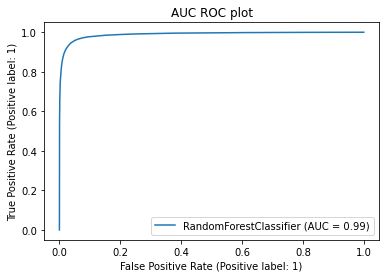

In [100]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(f_model,x_test,y_test)
plt.title("AUC ROC plot")
plt.show()


OBSERVATION

We got AUC Score of 0.99 which is really good.

##### SAVING MODEL IN PICKLE FORMAT

In [101]:
# pickeling or serialization of a file
import pickle
filename = 'MicroCredit_Final_Mode.pkl'
pickle.dump(f_model, open(filename, 'wb'))

##  PREDICTION COCLUSION

In [102]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(f_model.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
110054,1,1
110055,0,0
110056,0,0
110057,0,0


In [103]:
#saving predicted dataset as CSV file
df_comparisonc.to_csv('Microcredit_Defaulter.csv')


## CONCLUSION

In this project report, we used machine learning algorithms to predict the Micro-Credit Defaulters. We used proper procedure to analyze the dataset and finding the correlation between the features.

Here we selected the features which are correlated to each other and are independent in nature. Visualization helped us in understanding the data by graphical representation it made things easy for us to understand what data is trying to say.

Data cleaning is one of the most important steps to remove unrealistic 0 values and columns which had morethan 90% 0 values.

Using these feature we deployed 5 algorithms to find the best model and a hyper parameter tunning was done to the best model and we succeded in improvement of accuracy score.

Best Model for this Problem is found to be "RANDOM FOREST CLASSIFIER" with best accuracy of 99% on dataset.

Then we saved the best model and predicted the label. Our model’s performance felt good when we saw the predicted and actual values were almost same it felt really good observing good performance by our model.

This research evaluated individuals’ credit risk performance in a micro-finance environment using machine learning and deep learning techniques. While traditional methods utilizing models such as linear regression are commonly adopted to estimate reasonable accuracy nowadays, these models have been succeeded by extensive employment of machine and deep learning models that have been broadly applied and produce prediction outcomes with greater precision. Using real data, we compared the various machine learning algorithms’ accuracy by performing detailed experimental analysis while classifying individuals’ requesting a loan into three classes, namely, good, average, and poor.
In this project report, we have used machine learning algorithms to predict the micro credit defaulters. We have mentioned the step by step procedure to analyze the dataset and finding the correlation between the features. Thus we can select the features which are correlated to each other and are independent in nature. These feature set were then given as an input to four algorithms and a hyper parameter tuning was done to the best model and the accuracy has been improved.
Calculated the performance of each model using different performance metrics and compared them based on these metrics. Then we have also saved the best fit model and predicted the label. This is interesting that predicted and actual values are almost same.
